This file is created to investigate if there is any pattern of passengers distribution picked up at lincoln center at different time, which implicitly corresponding to different event audiences.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from scipy.misc import imread

In [2]:
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/yellow_tripdata_2016-01.csv',low_memory=False,nrows=500000)

In [4]:
#lincoln center coordinate
lat=40.772367
lon=-73.983070
#radius of range
distance = 0.25
# time range: between 0:00 to 0:30 
hour = 0
minute = 30


In [5]:
def locate(lat,lon,distance,hour,minute,df):
    numExamples = df.shape[0]
    lonPick=[]
    latPick=[]
    lonDrop=[]
    latDrop=[]
    lat1 = math.radians(lat)
    lon1 = math.radians(lon)
    for i in range(numExamples):
        dh = datetime.strptime(df['tpep_pickup_datetime'][i], "%Y-%m-%d %H:%M:%S").hour
        dm = datetime.strptime(df['tpep_pickup_datetime'][i], "%Y-%m-%d %H:%M:%S").minute
        if((dh != hour) or (dm>minute)):
            continue
        lat2 =math.radians(df['pickup_latitude'][i])
        lon2 =math.radians(df['pickup_longitude'][i])
        delLat=lat2-lat1
        delLon=lon2-lon1
        angel = (math.sin(delLat/2))**2 + math.cos(lat1)*math.cos(lat2)*(math.sin(delLon))**2
        if(6371 * 2 * math.atan2(math.sqrt(angel),math.sqrt(1-angel)) < distance):
            lonPick.append(df['pickup_longitude'][i])
            latPick.append(df['pickup_latitude'][i])
            lonDrop.append(df['dropoff_longitude'][i])
            latDrop.append(df['dropoff_latitude'][i])
    return lonPick,latPick,lonDrop,latDrop

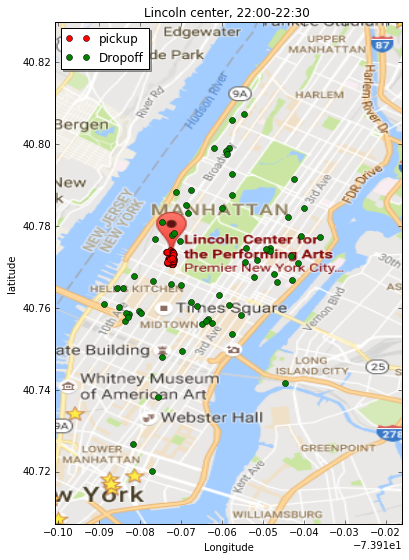

In [7]:
img = imread("E:/dataQ/mapS.png")
#plt.scatter(x,y,zorder=1)
lonPick,latPick,lonDrop,latDrop = locate(40.772367,-73.983070,0.25,22,30,df) 

fig, ax = plt.subplots()
ax.plot(lonPick,latPick,'ro', label='pickup')
ax.plot(lonDrop,latDrop,'go', label='Dropoff')
legend = ax.legend(loc='upper left', shadow=True)
plt.imshow(img,zorder=0,extent=[ -74.010783, -73.925982,40.707306, 40.829973])
plt.title('Lincoln center, 22:00-22:30 ')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.show()

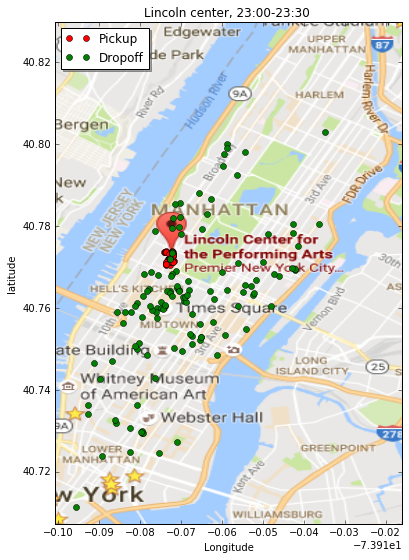

In [8]:
img = imread("E:/dataQ/mapS.png")

lonPick,latPick,lonDrop,latDrop = locate(40.772367,-73.983070,0.25,23,30,df) 

fig, ax = plt.subplots()
ax.plot(lonPick,latPick,'ro', label='Pickup')
ax.plot(lonDrop,latDrop,'go', label='Dropoff')
legend = ax.legend(loc='upper left', shadow=True)
plt.imshow(img,zorder=0,extent=[ -74.010783, -73.925982,40.707306, 40.829973])
plt.title('Lincoln center, 23:00-23:30 ')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.show()

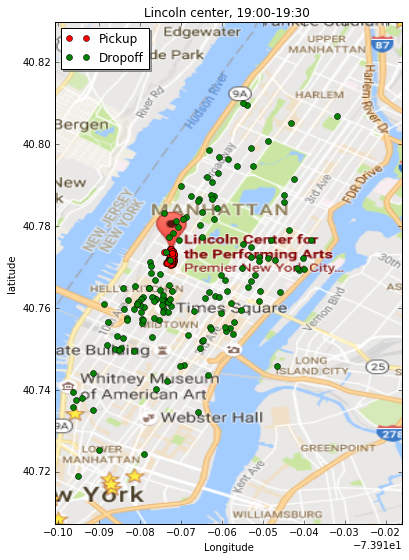

In [9]:
img = imread("E:/dataQ/mapS.png")

lonPick,latPick,lonDrop,latDrop = locate(40.772367,-73.983070,0.25,19,30,df) 

fig, ax = plt.subplots()
ax.plot(lonPick,latPick,'ro', label='Pickup')
ax.plot(lonDrop,latDrop,'go', label='Dropoff')
legend = ax.legend(loc='upper left', shadow=True)
plt.imshow(img,zorder=0,extent=[ -74.010783, -73.925982,40.707306, 40.829973])
plt.title('Lincoln center, 19:00-19:30 ')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.show()

We can see from above plots that passengers drop off locations show different distribution in different time, which can implies different component of audience for events ending in different time.